# GRIP - GRADUATE ROTATIONAL INTERNSHIP PROGRAM

# THE SPARKS FOUNDATION

### TASK 1- PREDICTION USING SUPERVISED ML

To predict the percentage of a student based on the number of study hours using a supervised ML model -linear regression.

### *Author - K.Niveditha*

### Data Extraction and Pre-processing

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset using read_csv function
df=pd.read_csv("http://bit.ly/w-data")

#Viewing the first 10 rows of the dataset
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Checking for the presence of null values. False means there are no null values.
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [4]:
#To find the total number of null values present in any column. Here it is 0 as there are null values present.
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#To find the duplicate values. We get all the values to be False as there are no duplicate values as well.
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

### Plotting of Data using library Matplotlib

Text(0, 0.5, 'Scores obtained')

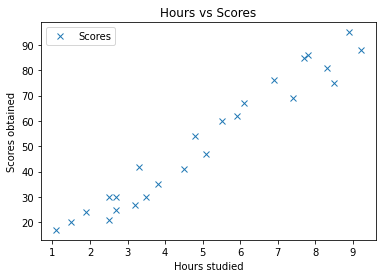

In [6]:
#Plotting Hours studied vs Scores obtained
df.plot(x='Hours',y='Scores', style='x')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')

### Preparing the data for training

In [7]:
#Dividing the attributes and labels i.e. input and output.

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values


In [8]:
#Splitting of data set into training and test set using Scikit's built-in function called tain_test_split().

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [9]:
#Checking the number of columns and rows in the divided set using shape method.
X_train.shape,X_test.shape

((20, 1), (5, 1))

In [10]:
y_train.shape,y_test.shape

((20,), (5,))

### Training the model

The splitted data det is then loaded into the model and fit using Linear Regression.

In [11]:
from sklearn.linear_model import LinearRegression  
Reg= LinearRegression()
Reg.fit(X_train,y_train)
print('Training of model is complete.')

Training of model is complete.


In [12]:
# Finding the coefficient to fit the line for linear regression.

# The below value means that for every one unit of change in hours studied, the change in the score is about 
# 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, 
# they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

Reg.coef_

array([9.91065648])

In [13]:
#Printing the value of intercept, i.e, slope to plot the line.
Reg.intercept_

2.018160041434683

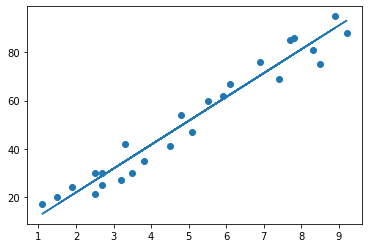

In [14]:
#Plotting the regression line
line = Reg.coef_*X+Reg.intercept_

#Plotting a scatter plot of test data
plt.scatter(X, y)
plt.plot(X, line)

### Final Prediction

In [15]:
#Prediction

Pred = Reg.predict(X_test)
Pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
#Merging into dataframe
Prediction =pd.DataFrame({'Hours Studied': [ x[0] for x in X_test],'Actual Marks': y_test, 'Predicted Marks': Pred})  
Prediction 

,Hours Studied,Actual Marks,Predicted Marks
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


### Predicting the score obtained by a student who studies for 9.5 hours. 

According to the model, a student scores on average of about 93.69 if he studies for 9.25 hours per day.

In [17]:
hours = 9.25
final_pred = Reg.predict([[hours]])
print("A student who has studied {} hours can score about {} marks.".format(hours,(final_pred[0])))

A student who has studied 9.25 hours can score about 93.69173248737538 marks.


### Evaluation of model

The final step is to evaluate the performance of algorithm. This step is important to compare how well different algorithms perform on a particular dataset. The lower value of 4.18 means that the overall error in evaluating the actual score and predicted score in 4.18.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, Pred)) 

Mean Absolute Error: 4.183859899002975
